# PHQ615 : Calculs 

## Calcul de la connexion affine et du tenseur de courbure à partir de la métrique

## Métrique de Friedmann-Lemaître

In [1]:
from sympy import *
from sympy import Array

init_printing()

t, r, θ, ϕ, k = symbols('t, r, θ, ϕ, k')
R = Function('R')
gd = Array([[1, 0, 0, 0],[0, -R(t)**2/(1-k*r*r), 0, 0], [0, 0, -R(t)**2*r**2, 0],[0, 0, 0, -R(t)**2*r**2*sin(θ)**2]])
coords = Array([t, r, θ, ϕ])
gu = Array([[1, 0, 0, 0],[0, -(1-k*r*r)/R(t)**2, 0, 0], [0, 0, -1/(R(t)**2*r**2), 0],[0, 0, 0, -1/(R(t)**2*r**2*sin(θ)**2)]])
gd

⎡1      0           0              0        ⎤
⎢                                           ⎥
⎢      2                                    ⎥
⎢    -R (t)                                 ⎥
⎢0  ──────────      0              0        ⎥
⎢        2                                  ⎥
⎢   - k⋅r  + 1                              ⎥
⎢                                           ⎥
⎢                 2  2                      ⎥
⎢0      0       -r ⋅R (t)          0        ⎥
⎢                                           ⎥
⎢                            2  2       2   ⎥
⎣0      0           0      -r ⋅R (t)⋅sin (θ)⎦

In [2]:
gu

⎡1     0         0             0        ⎤
⎢                                       ⎥
⎢      2                                ⎥
⎢   k⋅r  - 1                            ⎥
⎢0  ────────     0             0        ⎥
⎢     2                                 ⎥
⎢    R (t)                              ⎥
⎢                                       ⎥
⎢               -1                      ⎥
⎢0     0      ────────         0        ⎥
⎢              2  2                     ⎥
⎢             r ⋅R (t)                  ⎥
⎢                                       ⎥
⎢                             -1        ⎥
⎢0     0         0      ────────────────⎥
⎢                        2  2       2   ⎥
⎣                       r ⋅R (t)⋅sin (θ)⎦

In [3]:
# connexion affine 'covariante'
dg = derive_by_array(gd, coords)
gammad = (permutedims(dg,(2,0,1)) + permutedims(dg,(2,1,0))-dg)/2
gammad = factor(gammad)
gammad

⎡                                                                  ⎡          
⎢                                                                  ⎢          
⎢⎡0         0                0                     0            ⎤  ⎢          
⎢⎢                                                              ⎥  ⎢      0   
⎢⎢         d                                                    ⎥  ⎢          
⎢⎢   -R(t)⋅──(R(t))                                             ⎥  ⎢          
⎢⎢         dt                                                   ⎥  ⎢          
⎢⎢0  ───────────────         0                     0            ⎥  ⎢     d    
⎢⎢          2                                                   ⎥  ⎢R(t)⋅──(R(
⎢⎢       k⋅r  - 1                                               ⎥  ⎢     dt   
⎢⎢                                                              ⎥  ⎢──────────
⎢⎢                     2      d                                 ⎥  ⎢      2   
⎢⎢0         0         r ⋅R(t)⋅──(R(t))             0

In [4]:
# connexion affine
Γ = tensorcontraction(tensorproduct(gu, gammad), (1,2))
Γ = simplify(Γ)
Γ

⎡                                                                  ⎡          
⎢⎡0         0                0                     0            ⎤  ⎢          
⎢⎢                                                              ⎥  ⎢          
⎢⎢         d                                                    ⎥  ⎢   0      
⎢⎢   -R(t)⋅──(R(t))                                             ⎥  ⎢          
⎢⎢         dt                                                   ⎥  ⎢          
⎢⎢0  ───────────────         0                     0            ⎥  ⎢d         
⎢⎢          2                                                   ⎥  ⎢──(R(t))  
⎢⎢       k⋅r  - 1                                               ⎥  ⎢dt        
⎢⎢                                                              ⎥  ⎢────────  
⎢⎢                     2      d                                 ⎥  ⎢  R(t)    
⎢⎢0         0         r ⋅R(t)⋅──(R(t))             0            ⎥  ⎢          
⎢⎢                            dt                    

## Calcul du tenseur de courbure

In [5]:
R1 = derive_by_array(Γ, coords)
C = tensorcontraction(tensorproduct(Γ, Γ), (0,4))
R = permutedims(R1,(1,2,0,3)) - permutedims(R1,(1,2,3,0)) + permutedims(C,(2,0,3,1)) - permutedims(C,(2,0,1,3))
R = simplify(R)
R

⎡                                  ⎡                        2             ⎤   
⎢                                  ⎢                       d              ⎥   
⎢                                  ⎢                -R(t)⋅───(R(t))       ⎥   
⎢                                  ⎢                        2             ⎥   
⎢                                  ⎢                      dt              ⎥   
⎢                                  ⎢      0         ────────────────  0  0⎥   
⎢                                  ⎢                       2              ⎥   
⎢         ⎡0  0  0  0⎤             ⎢                    k⋅r  - 1          ⎥   
⎢         ⎢          ⎥             ⎢                                      ⎥   
⎢         ⎢0  0  0  0⎥             ⎢       2                              ⎥   
⎢         ⎢          ⎥             ⎢      d                               ⎥   
⎢         ⎢0  0  0  0⎥             ⎢R(t)⋅───(R(t))                        ⎥   
⎢         ⎢          ⎥             ⎢       2        

In [ ]:
# tenseur de Riemann covariant

In [11]:
Rcov =  tensorcontraction(tensorproduct(gd, R), (1,2))
Rcov = simplify(Rcov)
Rcov

⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                        ⎡0  0  0  0⎤                                         
⎢                        ⎢          ⎥                                         
⎢                        ⎢0  0  0  0⎥                                         
⎢                        ⎢          ⎥                                         
⎢                        ⎢0  0  0  0⎥                                         
⎢                        ⎢          ⎥               

In [12]:
# vérification des propriétés de symétrie de Rcov
A = Rcov + permutedims(Rcov,(0,2,3,1)) + permutedims(Rcov,(0,3,1,2))
A = simplify(A)
trigsimp(A)

⎡                                                                             
⎢                                                                             
⎢                            ⎡0  0  0                          0              
⎢                            ⎢                                                
⎢⎡0  0  0  0⎤  ⎡0  0  0  0⎤  ⎢0  0  0                          0              
⎢⎢          ⎥  ⎢          ⎥  ⎢                                                
⎢⎢0  0  0  0⎥  ⎢0  0  0  0⎥  ⎢0  0  0                          0              
⎢⎢          ⎥  ⎢          ⎥  ⎢                                                
⎢⎢0  0  0  0⎥  ⎢0  0  0  0⎥  ⎢          2                                     
⎢⎢          ⎥  ⎢          ⎥  ⎢         r ⋅(sin(2⋅θ)⋅tan(θ) + cos(2⋅θ) - 1)⋅R(t
⎢⎣0  0  0  0⎦  ⎣0  0  0  0⎦  ⎢                                                
⎢                            ⎢0  0  0  ───────────────────────────────────────
⎢                            ⎣                      

In [13]:
# vérification de la nullité de la contraction des deux premiers indices
tensorcontraction(R, (0,1))

⎡0  0  0  0⎤
⎢          ⎥
⎢0  0  0  0⎥
⎢          ⎥
⎢0  0  0  0⎥
⎢          ⎥
⎣0  0  0  0⎦

In [8]:
# tenseur de Ricci
Ricci = tensorcontraction(R, (0,2))
Ricci = simplify(Ricci)
Ricci

⎡     2                                                                       
⎢    d                                                                        
⎢-3⋅───(R(t))                                                                 
⎢     2                                                                       
⎢   dt                                                                        
⎢─────────────                     0                                          
⎢     R(t)                                                                    
⎢                                                                             
⎢                ⎛             2                     2⎞                       
⎢                ⎜            d            ⎛d       ⎞ ⎟                       
⎢               -⎜2⋅k + R(t)⋅───(R(t)) + 2⋅⎜──(R(t))⎟ ⎟                       
⎢                ⎜             2           ⎝dt      ⎠ ⎟                       
⎢                ⎝           dt                     

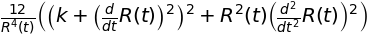

In [14]:
# carré de la courbure
Rcontra = tensorcontraction(tensorproduct(gu, R), (1,3))
Rcontra = tensorcontraction(tensorproduct(gu, Rcontra), (1,4))
Rcontra = tensorcontraction(tensorproduct(gu, Rcontra), (1,5))
R2 = tensorcontraction(tensorproduct(Rcov, Rcontra), (0,4))
R2 = tensorcontraction(R2, (0,3))
R2 = tensorcontraction(R2, (0,2))
R2 = tensorcontraction(R2, (0,1))
R2 = simplify(R2)
R2

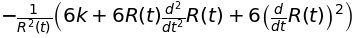

In [10]:
# Courbure scalaire
Rm = tensorcontraction(tensorproduct(gu,Ricci), (1,2))
Rscal = tensorcontraction(Rm, (0,1))
simplify(Rscal)

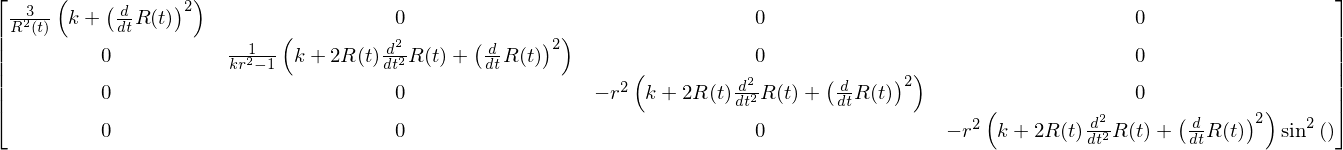

In [10]:
# tenseur d'Einstein
E = Ricci - gd*Rscal/2
E = simplify(E)
E

## Géométrie purement spatiale

In [11]:
from sympy import *
from sympy import Array

init_printing()

A, r, θ, ϕ, k = symbols('A, r, θ, ϕ, k')
gd = Array([[A**2/(1-k*r*r), 0, 0], [0, A**2*r**2, 0],[0, 0, A**2*r**2*sin(θ)**2]])
coords = Array([r, θ, ϕ])
gu = Array([[ (1-k*r*r)/A**2, 0, 0], [0, 1/(A**2*r**2), 0],[0, 0, 1/(A**2*r**2*sin(θ)**2)]])
gd

⎡     2                          ⎤
⎢    A                           ⎥
⎢──────────    0          0      ⎥
⎢     2                          ⎥
⎢- k⋅r  + 1                      ⎥
⎢                                ⎥
⎢             2  2               ⎥
⎢    0       A ⋅r         0      ⎥
⎢                                ⎥
⎢                    2  2    2   ⎥
⎣    0         0    A ⋅r ⋅sin (θ)⎦

In [12]:
# connexion affine 'covariante'
dg = derive_by_array(gd, coords)
gammad = (permutedims(dg,(2,0,1)) + permutedims(dg,(2,1,0))-dg)/2
gammad = factor(gammad)
gammad

⎡⎡    2                            ⎤                                          
⎢⎢   A ⋅k⋅r                        ⎥                                          
⎢⎢───────────    0          0      ⎥  ⎡       2                        ⎤  ⎡   
⎢⎢          2                      ⎥  ⎢ 0    A ⋅r           0          ⎥  ⎢   
⎢⎢⎛   2    ⎞                       ⎥  ⎢                                ⎥  ⎢   
⎢⎢⎝k⋅r  - 1⎠                       ⎥  ⎢ 2                              ⎥  ⎢   
⎢⎢                                 ⎥  ⎢A ⋅r   0             0          ⎥  ⎢   
⎢⎢               2                 ⎥  ⎢                                ⎥  ⎢   
⎢⎢     0       -A ⋅r        0      ⎥  ⎢              2  2              ⎥  ⎢ 2 
⎢⎢                                 ⎥  ⎣ 0     0    -A ⋅r ⋅sin(θ)⋅cos(θ)⎦  ⎣A ⋅
⎢⎢                      2      2   ⎥                                          
⎣⎣     0         0    -A ⋅r⋅sin (θ)⎦                                          

                                                   

In [13]:
# connexion affine
Γ = tensorcontraction(tensorproduct(gu, gammad), (1,2))
Γ = simplify(Γ)
Γ

⎡⎡ -k⋅r                                   ⎤  ⎡   1            ⎤  ⎡            
⎢⎢────────     0               0          ⎥  ⎢0  ─      0     ⎥  ⎢0    0      
⎢⎢   2                                    ⎥  ⎢   r            ⎥  ⎢            
⎢⎢k⋅r  - 1                                ⎥  ⎢                ⎥  ⎢            
⎢⎢                                        ⎥  ⎢1               ⎥  ⎢            
⎢⎢             3                          ⎥  ⎢─  0      0     ⎥  ⎢0    0     ─
⎢⎢   0      k⋅r  - r           0          ⎥  ⎢r               ⎥  ⎢           t
⎢⎢                                        ⎥  ⎢                ⎥  ⎢            
⎢⎢                      ⎛   2    ⎞    2   ⎥  ⎢      -sin(2⋅θ) ⎥  ⎢1    1      
⎢⎣   0         0      r⋅⎝k⋅r  - 1⎠⋅sin (θ)⎦  ⎢0  0  ──────────⎥  ⎢─  ──────   
⎣                                            ⎣          2     ⎦  ⎣r  tan(θ)   

 1   ⎤⎤
 ─   ⎥⎥
 r   ⎥⎥
     ⎥⎥
 1   ⎥⎥
─────⎥⎥
an(θ)⎥⎥
     ⎥⎥
     ⎥⎥
 0   ⎥⎥
     ⎦⎦

In [14]:
R1 = derive_by_array(Γ, coords)
C = tensorcontraction(tensorproduct(Γ, Γ), (0,4))
R = permutedims(R1,(1,2,0,3)) - permutedims(R1,(1,2,3,0)) + permutedims(C,(2,0,3,1)) - permutedims(C,(2,0,1,3))
R = simplify(R)
R

⎡                                           ⎡                                 
⎢                                           ⎢      0        0                 
⎢                         ⎡          2   ⎤  ⎢                                 
⎢       ⎡0  0  0⎤         ⎢  0    k⋅r   0⎥  ⎢                    ⎛   2    ⎞   
⎢       ⎢       ⎥         ⎢              ⎥  ⎢                  r⋅⎝k⋅r  - 1⎠⋅(s
⎢       ⎢0  0  0⎥         ⎢    2         ⎥  ⎢      0        0  ───────────────
⎢       ⎢       ⎥         ⎢-k⋅r    0    0⎥  ⎢                                 
⎢       ⎣0  0  0⎦         ⎢              ⎥  ⎢                                 
⎢                         ⎣  0     0    0⎦  ⎢    2    2                       
⎢                                           ⎣-k⋅r ⋅sin (θ)  0                 
⎢                                                                             
⎢⎡             k       ⎤                                                      
⎢⎢   0      ────────  0⎥                            

In [15]:
# tenseur de Ricci
Ricci = tensorcontraction(R, (0,2))
Ricci = simplify(Ricci)
Ricci

⎡ -2⋅k                           ⎤
⎢────────    0           0       ⎥
⎢   2                            ⎥
⎢k⋅r  - 1                        ⎥
⎢                                ⎥
⎢               2                ⎥
⎢   0      2⋅k⋅r         0       ⎥
⎢                                ⎥
⎢                       2    2   ⎥
⎣   0        0     2⋅k⋅r ⋅sin (θ)⎦

In [16]:
# Courbure scalaire
Rm = tensorcontraction(tensorproduct(gu,Ricci), (1,2))
Rscal = tensorcontraction(Rm, (0,1))
simplify(Rscal)